In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
csv = 'mushroom_encoder1.csv'
mushroom_e = pd.read_csv(csv)
mushroom_e.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


In [3]:
target = mushroom_e["class"]
target_names = ["poisonous", "edible"]

In [4]:
data = mushroom_e.drop("class", axis=1)
feature_names = data.columns
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [5]:
X = mushroom_e.iloc[:,0:20]  # all rows, all the features and no labels
y = mushroom_e.iloc[:, 21]  # all rows, label only

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42,test_size=0.95)

k: 1, Train/Test Score: 1.000/0.978
k: 3, Train/Test Score: 0.983/0.969
k: 5, Train/Test Score: 0.975/0.961
k: 7, Train/Test Score: 0.951/0.943
k: 9, Train/Test Score: 0.948/0.933
k: 11, Train/Test Score: 0.933/0.925
k: 13, Train/Test Score: 0.919/0.918
k: 15, Train/Test Score: 0.914/0.912
k: 17, Train/Test Score: 0.901/0.908
k: 19, Train/Test Score: 0.894/0.900


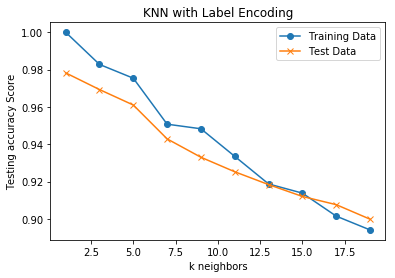

In [9]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o',label = 'Training Data')
plt.plot(range(1, 20, 2), test_scores, marker="x", label = 'Test Data')
plt.legend(loc ="upper right")
plt.title('KNN with Label Encoding')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('KNN_Label_encoding.png')
plt.show()